In [226]:
# reference: https://github.com/doguilmak/Object-Detection-with-Faster-R-CNN/blob/main/use_objectdetection_faster_r_cnn.ipynb
import torchvision
from torchvision import  transforms
import torch
from torch import no_grad
import requests
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [227]:
def get_predictions(pred, threshold=0.8, objects=None):
    """
    This function will assign a string name to a predicted class and eliminate predictions whose likelihood  is under a threshold 
    
    pred: a list where each element contains a tuple that corresponds to information about  the different objects; Each element includes a tuple with the class yhat, probability of belonging to that class and the coordinates of the bounding box corresponding to the object 
    image : frozen surface
    predicted_classes: a list where each element contains a tuple that corresponds to information about  the different objects; Each element includes a tuple with the class name, probability of belonging to that class and the coordinates of the bounding box corresponding to the object 
    thre
    """

    predicted_classes= [(COCO_INSTANCE_CATEGORY_NAMES[i],p,[(box[0], box[1]), (box[2], box[3])]) for i,p,box in zip(list(pred[0]['labels'].numpy()),pred[0]['scores'].detach().numpy(),list(pred[0]['boxes'].detach().numpy()))]
    predicted_classes=[  stuff  for stuff in predicted_classes  if stuff[1]>threshold ]

    if objects  and predicted_classes :
        predicted_classes=[ (name, p, box) for name, p, box in predicted_classes if name in  objects ]
    return predicted_classes

In [228]:
def draw_box(pred_class, img, rect_th=2, text_size=0.5, text_th=2, download_image=False, img_name="img"):
    """
    draws box around each object 
    
    predicted_classes: a list where each element contains a tuple that corresponds to information about the different objects; Each element includes a tuple with the class name, probability of belonging to that class and the coordinates of the bounding box corresponding to the object 
    image : frozen surface 
   
    """
    image = (np.clip(cv2.cvtColor(np.clip(img.numpy().transpose((1, 2, 0)), 0, 1), cv2.COLOR_RGB2BGR), 0, 1) * 255).astype(np.uint8).copy()

    for predicted_class in pred_class:

        label=predicted_class[0]
        probability=predicted_class[1]
        box=predicted_class[2]
        t = round(box[0][0].tolist())
        l = round(box[0][1].tolist())
        r = round(box[1][0].tolist())
        b = round(box[1][1].tolist())

        # Giving brief information about rectange, class and probability.
        from colorama import Fore
        from colorama import Style
        print(f"\nLabel: {Fore.GREEN}{label}{Style.RESET_ALL}")
        print(f"Box coordinates: {t}, {l}, {r}, {b}")
        print(f"Probability: {probability}")

        # Drawing rectangle and adding text on the picture based on their class and size.
        cv2.rectangle(image, (t, l), (r, b), (0, 255, 0), rect_th)
        cv2.rectangle(image, (t, l), (t+110, l+17), (255, 255, 255), -1)
        cv2.putText(image, label, (t+10, l+12),  cv2.FONT_HERSHEY_SIMPLEX,
                    text_size, (0,255,0), thickness=text_th)
        cv2.putText(image, label+": "+str(round(probability, 2)),
                    (t+10, l+12),  cv2.FONT_HERSHEY_SIMPLEX, text_size,
                    (0, 255, 0),thickness=text_th)

    # Plotting image
    image = np.array(image)
    plt.figure(figsize=(15, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # if download_image:
    #     # plt.savefig(f'{img_name}.png')
    # else:
    #     pass
    plt.show()

    del(img)
    del(image)  

In [229]:
def save_RAM(image_=False):
    global image, img, pred
    torch.cuda.empty_cache()
    del(img)
    del(pred)
    if image_:
        image.close()
        del(image)

In [230]:
model_ = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model_.eval()

for name, param in model_.named_parameters():
    # freezing the part of the model as no changes happen to its parameters
    param.requires_grad = False
print("done")

done


In [231]:
def model(x):
    with torch.no_grad():
        yhat = model_(x)
    return yhat

In [232]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]
len(COCO_INSTANCE_CATEGORY_NAMES)

91

In [233]:
transform = transforms.Compose([transforms.ToTensor()])
img = transform(image)
img

tensor([[[0.0471, 0.0353, 0.0471,  ..., 0.0941, 0.1020, 0.1020],
         [0.0392, 0.0314, 0.0471,  ..., 0.1216, 0.1294, 0.1333],
         [0.0353, 0.0314, 0.0431,  ..., 0.1490, 0.1529, 0.1569],
         ...,
         [0.1373, 0.1490, 0.1569,  ..., 0.8431, 0.8353, 0.8627],
         [0.1490, 0.1490, 0.1451,  ..., 0.8392, 0.8275, 0.8549],
         [0.1608, 0.1608, 0.1529,  ..., 0.8667, 0.8549, 0.8784]],

        [[0.0627, 0.0510, 0.0627,  ..., 0.0902, 0.0980, 0.0980],
         [0.0549, 0.0471, 0.0627,  ..., 0.1176, 0.1294, 0.1333],
         [0.0510, 0.0471, 0.0588,  ..., 0.1569, 0.1608, 0.1647],
         ...,
         [0.2118, 0.2235, 0.2314,  ..., 0.7725, 0.7647, 0.7922],
         [0.2235, 0.2235, 0.2196,  ..., 0.7686, 0.7569, 0.7843],
         [0.2314, 0.2353, 0.2275,  ..., 0.7961, 0.7843, 0.8078]],

        [[0.0667, 0.0549, 0.0667,  ..., 0.0824, 0.0902, 0.0902],
         [0.0588, 0.0510, 0.0667,  ..., 0.0980, 0.0980, 0.1020],
         [0.0549, 0.0510, 0.0627,  ..., 0.1137, 0.1176, 0.

In [234]:
pred = model([img])
len(pred[0]['labels'])

8

In [235]:
pred[0]['labels']

tensor([25, 25,  1,  1,  1,  1, 31,  1])

In [236]:
pred[0]['scores']

tensor([0.9993, 0.9985, 0.9976, 0.9288, 0.1961, 0.1764, 0.1494, 0.1476])

In [237]:
index=pred[0]['labels'][0].item()
COCO_INSTANCE_CATEGORY_NAMES[index]

'giraffe'

In [238]:
bounding_box=pred[0]['boxes'][0].tolist()
bounding_box

[319.4202880859375, 126.60989379882812, 445.73876953125, 299.4406433105469]

In [239]:
t, l, r, b = [round(x) for x in bounding_box]
print(t, l, r, b)

319 127 446 299



Label: giraffe
Box coordinates: 319, 127, 446, 299
Probability: 0.99930739402771

Label: giraffe
Box coordinates: 78, 108, 277, 367
Probability: 0.9985185265541077

Label: person
Box coordinates: 1, 56, 70, 363
Probability: 0.997631311416626

Label: person
Box coordinates: 1, 210, 56, 371
Probability: 0.9287725687026978


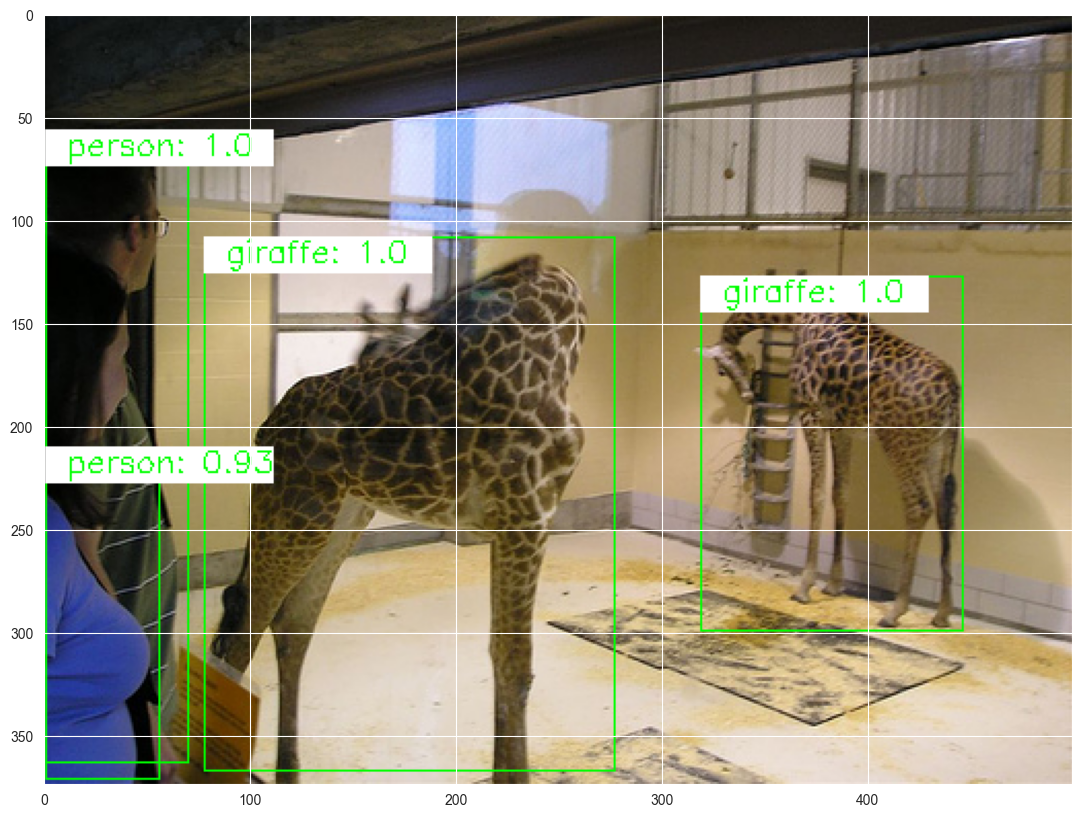

In [250]:
# img_path='/Users/ashleycui/data/coco2014/val2014/COCO_val2014_000000000042.jpg'
img_path='/Users/ashleycui/data/coco2014/val2014/COCO_val2014_000000000136.jpg'
# img_path='/Users/ashleycui/data/coco2014/val2014/COCO_val2014_000000001083.jpg'
# img_path='/Users/ashleycui/data/coco2014/val2014/COCO_val2014_000000001374.jpg'
# img_path='/Users/ashleycui/data/coco2014/val2014/COCO_val2014_000000001561.jpg'

half = 0.5
image = Image.open(img_path)
# image.resize([int(half * s) for s in image.size])

img = transform(image)
pred = model([img])
pred_thresh=get_predictions(pred, threshold=0.5)
draw_box(pred_thresh, img, rect_th=1, text_size= 0.5, text_th=1)

del pred_thresh

In [241]:
def coord_calculator(x, y, w, h, ih, iw):
    x1 = (x - (w / 2)) * iw
    x2 = (x + (w / 2)) * iw
    y1 = (y - (h / 2)) * ih
    y2 = (y + (h / 2)) * ih
    return round(x1), round(y1), round(x2), round(y2)

In [242]:
# coord_calculator(0.76, 0.57, 0.26, 0.44, 374, 500)
# coord_calculator(0.35, 0.65, 0.37, 0.68, 374, 500)
coord_calculator(0.06, 0.65, 0.11, 0.69, 374, 500)
# coord_calculator(0.07, 0.58, 0.14, 0.84, 374, 500)

(2, 114, 57, 372)

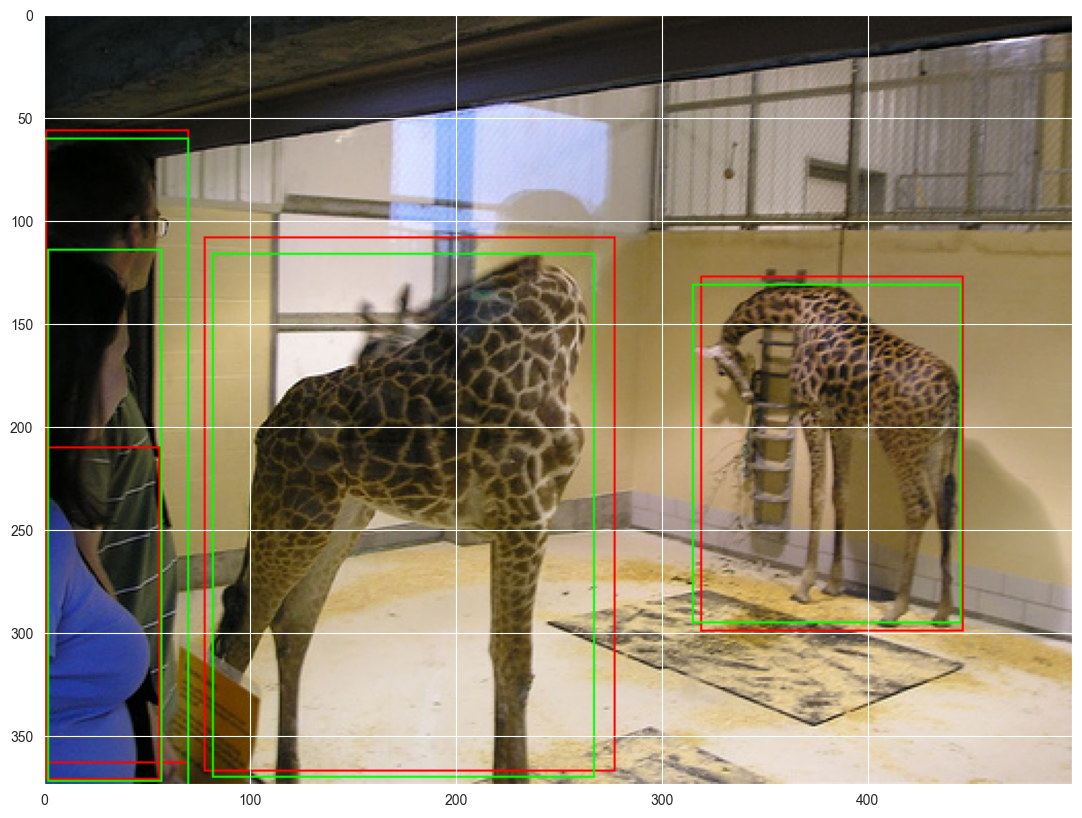

In [243]:
img_path='/Users/ashleycui/data/coco2014/val2014/COCO_val2014_000000000136.jpg'
image = Image.open(img_path)
image.resize([int(half * s) for s in image.size])

img = transform(image)
pred = model([img])
pred_thresh=get_predictions(pred, threshold=0.8)

# draw_box(pred_thresh, img, rect_th=1, text_size= 0.5, text_th=1)


img = (np.clip(cv2.cvtColor(np.clip(img.numpy().transpose((1, 2, 0)), 0, 1), cv2.COLOR_RGB2BGR), 0, 1) * 255).astype(np.uint8).copy()
# {'x1':319, 'x2':446, 'y1':127, 'y2':299}, {'x1':175, 'x2':360, 'y1':243.1, 'y2':381.48}
# right small giraffe
cv2.rectangle(img, (319, 127), (446, 299), (0, 0, 255), 1)
cv2.rectangle(img, (315, 131), (445, 295), (0, 255, 0), 1) 

# left big giraffe
cv2.rectangle(img, (78, 108), (277, 367), (0, 0, 255), 1)
cv2.rectangle(img, (82, 116), (267, 370), (0, 255, 0), 1)
# 
# # tall person
cv2.rectangle(img, (1, 56), (70, 363), (0, 0, 255), 1)
cv2.rectangle(img, (0, 60), (70, 374), (0, 255, 0), 1)
# 
# # blue shirt person
cv2.rectangle(img, (1, 210), (56, 371), (0, 0, 255), 1)
cv2.rectangle(img, (2, 114), (57, 372), (0, 255, 0), 1)

# Plotting image
img = np.array(img)
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# if download_image:
#     # plt.savefig(f'{img_name}.png')
# else:
#     pass
plt.show()

del pred_thresh

In [244]:
def get_iou(bb1, bb2):
    """
    Calculate the Intersection over Union (IoU) of two bounding boxes.

    Parameters
    ----------
    bb1 : dict
        Keys: {'x1', 'x2', 'y1', 'y2'}
        The (x1, y1) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner
    bb2 : dict
        Keys: {'x1', 'x2', 'y1', 'y2'}
        The (x, y) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner

    Returns
    -------
    float
        in [0, 1]
    """
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    # determine the coordinates of the intersection rectangle
    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    # The intersection of two axis-aligned bounding boxes is always an
    # axis-aligned bounding box
    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # compute the area of both AABBs
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    print(intersection_area)
    print(bb1_area)
    print(bb2_area)
    return iou

# get_iou({'x1':78, 'x2':277, 'y1':108, 'y2':367}, {'x1':175, 'x2':360, 'y1':131, 'y2':381})
get_iou({'x1':319, 'x2':446, 'y1':127, 'y2':299}, {'x1':315, 'x2':445, 'y1':131, 'y2':295})

20664
21844
21320


0.9184

In [245]:
# coord_calculator(0.32, 0.54, 0.07, 0.11, 427, 640)
# coord_calculator(0.61, 0.46, 0.08, 0.12, 427, 640)
coord_calculator(0.63, 0.5, 0.06, 0.11, 427, 640)

(384, 190, 422, 237)

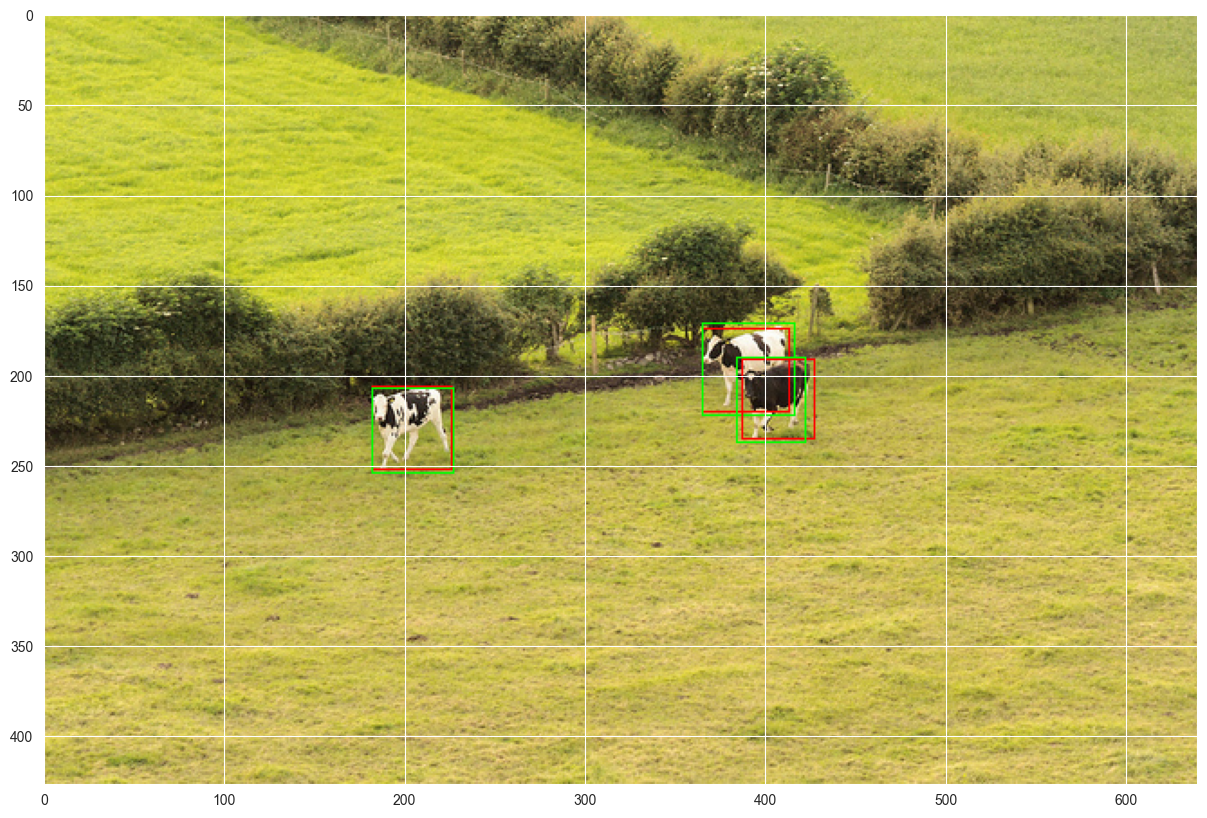

In [246]:
img_path='/Users/ashleycui/data/coco2014/val2014/COCO_val2014_000000001083.jpg'
image = Image.open(img_path)
image.resize([int(half * s) for s in image.size])

img = transform(image)
pred = model([img])
pred_thresh=get_predictions(pred, threshold=0.8)

# draw_box(pred_thresh, img, rect_th=1, text_size= 0.5, text_th=1)

img = (np.clip(cv2.cvtColor(np.clip(img.numpy().transpose((1, 2, 0)), 0, 1), cv2.COLOR_RGB2BGR), 0, 1) * 255).astype(np.uint8).copy()

# 182, 206, 226, 252
# 365, 174, 413, 220
# 387, 191, 427, 235

# left cow
cv2.rectangle(img, (182, 206), (226, 252), (0, 0, 255), 1)
cv2.rectangle(img, (182, 207), (227, 254), (0, 255, 0), 1)

# middle cow
cv2.rectangle(img, (365, 174), (413, 220), (0, 0, 255), 1)
cv2.rectangle(img, (365, 171), (416, 222), (0, 255, 0), 1)

# right cow
cv2.rectangle(img, (387, 191), (427, 235), (0, 0, 255), 1)
cv2.rectangle(img, (384, 190), (422, 237), (0, 255, 0), 1)

# Plotting image
img = np.array(img)
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# if download_image:
#     # plt.savefig(f'{img_name}.png')
# else:
#     pass
plt.show()

del pred_thresh

In [247]:
# right cow
get_iou({'x1':387, 'x2':427, 'y1':191, 'y2':235}, {'x1':403, 'x2':441, 'y1':214, 'y2':260})

504
1760
1748


0.1677762982689747

In [248]:
# if threshold is set too low, objects that are not there could be detected

pred_thresh=get_predictions(pred,threshold=0.01)
draw_box(pred_thresh, img, rect_th= 1, text_size=0.5, text_th=1)

del pred_thresh

AttributeError: 'numpy.ndarray' object has no attribute 'numpy'